<a href="https://colab.research.google.com/github/khanhquynh25/DemoGit/blob/master/nhandienkhuonmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 101 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     6,291,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,424,067 (24.51 MB)

 Trainable params: 6,424,067 (24.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.3718 - loss: 3.3415 - val_accuracy: 0.2083 - val_loss: 16.9815
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3873 - loss: 10.4304 - val_accuracy: 0.4167 - val_loss: 10.7320
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5357 - loss: 7.7527 - val_accuracy: 0.5833 - val_loss: 2.0745
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6574 - loss: 3.1130 - val_accuracy: 0.7500 - val_loss: 0.4481
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6625 - loss: 2.3820 - val_accuracy: 0.5833 - val_loss: 1.1628
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6551 - loss: 2.1331 - val_accuracy: 0.8333 - val_loss: 0.2458
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7166 - loss: 1.0937 - val_accuracy: 0.9167 - val_loss: 0.2945
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6124 - loss: 2.7608 - val_accuracy: 0.7917 - val_loss: 0.2911
Epoch 9/15


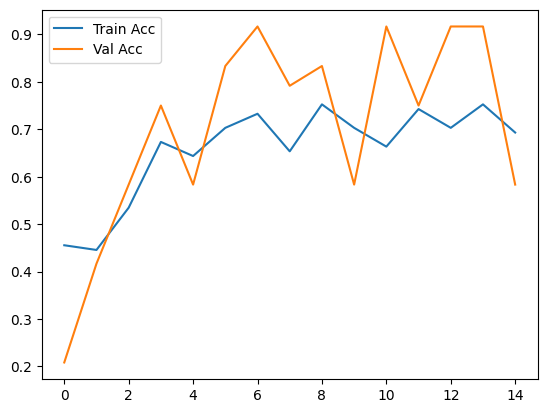

✅ Model đã lưu vào Drive


In [ ]:
import os
from google.colab import drive
import matplotlib.pyplot as plt

# ===== 1. Kết nối Google Drive =====
drive.mount("/content/drive")

# Thư mục dataset
base_dir = "/content/drive/MyDrive/nhandienkhuonmat"

# ===== 2. Tiền xử lý dữ liệu =====
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 64, 64  # resize ảnh nhỏ để huấn luyện nhanh
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # chia train/val
)

train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

# ===== 3. Xây dựng ANN =====
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

model = Sequential([
    Flatten(input_shape=(img_height, img_width, 3)),   # ảnh màu RGB
    Dense(512, activation="relu"),
    Dropout(0.3),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation="softmax") # số lớp = số người
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# ===== 4. Huấn luyện =====
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15
)

# ===== 5. Vẽ biểu đồ Accuracy/Loss =====
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

# ===== 6. Lưu model =====
model.save("/content/drive/MyDrive/face_ann.h5")
print("✅ Model đã lưu vào Drive")


In [6]:
import os
from google.colab import drive

# ===== 1. Kết nối Google Drive =====
drive.mount("/content/drive", force_remount=True)

# Thư mục dataset (3 người)
base_dir = "/content/drive/MyDrive/nhandienkhuonmat"

# ===== 2. Tiền xử lý dữ liệu =====
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 64, 64
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

print("✅ Danh sách class:", train_gen.class_indices)

# ===== 3. Xây dựng ANN =====
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

model = Sequential([
    Flatten(input_shape=(img_height, img_width, 3)),
    Dense(512, activation="relu"),
    Dropout(0.3),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation="softmax")  # số lớp = 3 người
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# ===== 4. Huấn luyện =====
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15
)

# Lưu model
model.save("/content/drive/MyDrive/face_ann.h5")

# ===== 5. Giao diện Gradio =====
import gradio as gr
import numpy as np
from tensorflow.keras.preprocessing import image

labels = list(train_gen.class_indices.keys())

def predict_face(img):
    # Resize ảnh
    img = img.resize((img_width, img_height))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Dự đoán
    preds = model.predict(img_array)
    class_idx = np.argmax(preds)

    return f"👤 Người dự đoán: {labels[class_idx]}"

# CSS custom cho giao diện luxury
custom_css = """
body {background: linear-gradient(135deg, #0f2027, #203a43, #2c5364);}
textarea, .output-class, .wrap {
    color: #f1f1f1 !important;
    background-color: rgba(20, 20, 20, 0.85) !important;
    font-size: 22px !important;
    font-weight: bold !important;
    text-shadow: 0 0 8px #00f7ff, 0 0 12px #0ff;
    border-radius: 12px !important;
}
h1, h2, .title, .description {
    color: #00f7ff !important;
    text-shadow: 0 0 10px #00f7ff, 0 0 20px #0ff;
}
"""

demo = gr.Interface(
    fn=predict_face,
    inputs=gr.Image(type="pil"),
    outputs=gr.Textbox(label="Kết quả"),
    title="✨ Nhận diện khuôn mặt bằng ANN ✨",
    description=" Tải ảnh khuôn mặt đẻ nhận diện",
    css=custom_css
)

demo.launch(share=True)



Mounted at /content/drive
Found 101 images belonging to 3 classes.
Found 24 images belonging to 3 classes.
✅ Danh sách class: {'Nguyễn Bá Phong - MSSV: 31241026378': 0, 'Nguyễn Phan Khánh Quỳnh - MSSV: 31241022768': 1, 'Nguyễn Thành  Trung-MSSV: 31241020997': 2}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.4713 - loss: 5.8521 - val_accuracy: 0.4167 - val_loss: 11.2439
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.4964 - loss: 8.7129 - val_accuracy: 0.5833 - val_loss: 1.9770
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6767 - loss: 2.6837 - val_accuracy: 0.7917 - val_loss: 0.6435
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6129 - loss: 3.0297 - val_accuracy: 0.8750 - val_loss: 0.4690
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5812 - loss: 3.5021 - val_accuracy: 0.8750 - val_loss: 0.2726
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5528 - loss: 3.3753 - val_accuracy: 0.7500 - val_loss: 0.7548
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.6996 - loss: 1.5178 - val_accuracy: 0.7500 - val_loss: 0.6216
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6185 - loss: 2.4340 - val_accuracy: 0.7917 - val_loss: 0.8268
Epoch 9/15
4/

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://561dd6b2a3df959d59.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
